# Capstone Project: Toronto BikeShare
## Part 2: Machine Learning Models
---
Jason Ho<br>
December 5th, 2020

In this notebook we will be creating some Machine Learning models on the cleaned dataset to see if we can answer the question of whether we can predict if a bikeshare user is going to bring the bike back late. Before we select and fit models, we will need to do some data wrangling on the dataset and then create a binary classifier for our dependent variable.

Please load the environment created specifically for this capstone project before moving ahead.

Resources that I had consulted regarding various code used below are follows:<br>
https://python-graph-gallery.com/<br>
https://stackoverflow.com/<br>

Other links would be referenced later on in the notebook as well.

In [182]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Timer
from tqdm import tqdm
import time

# Train/Test Splitter
from sklearn.model_selection import train_test_split

# Scalars
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Decomposition
from sklearn.decomposition import PCA

# Hide warnings that appear when we use logistic regression without updating Scikit-learn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score

## Table of Contents
[Data Dictionary](#Data-Dictionary)<br>

[Data Cleaning](#Data-Cleaning)<br>

[Data Wrangling](#Data-Wrangling)<br>

[Machine Learning Modelling](#Machine-Learning-Modelling)<br>
- [Undersample the Data](#Undersample-the-Data)<br>
- [Scaling the Data](#Scaling-the-Data)<br>
- [Removing Multicollinearity](#Removing-Multicollinearity)<br>
- [Retesting the Model](#Retesting-the-Model)<br>

[Summary & Next Steps](#Summary-&-Next-Steps)

## Data Dictionary

- `Trip Id`: Unique ID code for individual trip taken.
- `Subscription Id`: Unique ID code for the individual member, this can be used to track Annual Member usage
- `Bike Id`: Unique ID for the individual bike used
- `Start Time`: Trip start time
- `Start Station Id`: Unique ID code for the start station
- `Start Station Name`: Name of the start station
- `Start Station Latitude`: Latitude coordinates ofthe  start station
- `Start Station Longitude`: Longitude coordinates of the start station
- `Start Station Elevation`: Elevation in meters for the start station
- `Start Station Capacity`: Bike dock capacity for the start station
- `Start Station Accepts Credit Card`: Binary classifier for whether the station accepts credit card payments
- `Start Station FSA`: Forward Sortation Area for where the start station is located
- `End Time`: Trip end time.
- `End Station Id`: Unique ID code for the end station.
- `End Station Name`: Name of the end station.
- `End Station Latitude`: Latitude coordinates of the end station
- `End Station Longitude`: Longitude coordinates of the end station
- `End Station Elevation`: Elevation in meters for the end station
- `End Station Capacity`: Bike dock capacity for the end station
- `End Station Accepts Credit Card`: Binary classifier for whether the end station accepts credit card payments
- `End Station FSA`: Forward Sortation Area for where the end station is located
- `Trip Duration Minutes`: Duration of the trip in minutes.
- `Is Member`: Binary classifier for whether the user is an annual member
- `Temp (°C)`: Temperature in Celsius at the start of the trip
- `Rel Hum (%)`: Relative Humdity at the start of the trip
- `Wind Spd (km/h)`: Wind speed in km/h at the start of the trip

## Data Cleaning

Back to [Table of Contents](#Table-of-Contents).<br>

I decided to just use the dataset with 2019 and 2020 trips which I created in my last notebook as it contains 2 more features `Subscription Id` and `Bike Id` which may help in my machine learning model.

In [2]:
# Load Dataset 
df = pd.read_csv('data/master_df2.csv')

In [3]:
# View Dataset
df.head()

,Unnamed: 0,Trip Id,Subscription Id,Bike Id,Start Time,Start Station Id,Start Station Name,Start Station Latitude,Start Station Longitude,Start Station Elevation,...,End Station Longitude,End Station Elevation,End Station Capacity,End Station Accepts Credit Card,End Station FSA,Trip Duration Minutes,Is Member,Temp (°C),Rel Hum (%),Wind Spd (km/h)
0,0,4581278,199751,1296,2019-01-01 00:08:00,7021,Bay St / Albert St,43.653264,-79.382458,107.0,...,-79.431734,97.0,16.0,0.0,M6K,26,1,4.3,98.0,11.0
1,1,4581279,294730,2947,2019-01-01 00:10:00,7160,King St W / Tecumseth St,43.643333,-79.405556,89.0,...,-79.375091,90.0,19.0,1.0,M5B,19,1,4.3,98.0,11.0
2,2,4581280,197252,2293,2019-01-01 00:15:00,7055,Jarvis St / Carlton St,43.662070,-79.376170,103.0,...,-79.375274,83.0,19.0,1.0,M5E,10,1,4.3,98.0,11.0
3,3,4581281,171700,283,2019-01-01 00:16:00,7012,Elizabeth St / Edward St (Bus Terminal),43.656026,-79.385327,92.0,...,-79.385655,115.0,12.0,0.0,M5G,4,1,4.3,98.0,11.0
4,4,4581282,306314,1799,2019-01-01 00:19:00,7041,Edward St / Yonge St,43.656729,-79.382736,103.0,...,-79.389531,115.0,19.0,1.0,M5T,5,1,4.3,98.0,11.0


In [4]:
# Drop duplicate index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Check for null values
print(f'Total Number of Null values:\n\n{df.isna().sum()}')
print('\n----------------------------------------\n')
print(f'Total Percentage of Null values:\n\n{df.isna().mean()*100}')

Total Number of Null values:

Trip Id                              0
Subscription Id                      0
Bike Id                              0
Start Time                           0
Start Station Id                     0
Start Station Name                   0
Start Station Latitude               0
Start Station Longitude              0
Start Station Elevation              0
Start Station Capacity               0
Start Station Accepts Credit Card    0
Start Station FSA                    0
End Time                             0
End Station Id                       0
End Station Name                     0
End Station Latitude                 0
End Station Longitude                0
End Station Elevation                0
End Station Capacity                 0
End Station Accepts Credit Card      0
End Station FSA                      0
Trip Duration Minutes                0
Is Member                            0
Temp (°C)                            0
Rel Hum (%)                       

In [6]:
# Datatype check
df.dtypes

Trip Id                                int64
Subscription Id                        int64
Bike Id                                int64
Start Time                            object
Start Station Id                       int64
Start Station Name                    object
Start Station Latitude               float64
Start Station Longitude              float64
Start Station Elevation              float64
Start Station Capacity               float64
Start Station Accepts Credit Card    float64
Start Station FSA                     object
End Time                              object
End Station Id                         int64
End Station Name                      object
End Station Latitude                 float64
End Station Longitude                float64
End Station Elevation                float64
End Station Capacity                 float64
End Station Accepts Credit Card      float64
End Station FSA                       object
Trip Duration Minutes                  int64
Is Member 

- `Capacity`, `Accepts Credit Card` for Start and End Station can be changed from float64 to int64
- `Start Time` and `End Time` need to be converted from object to datetime

In [7]:
# Change dtypes
df['Start Station Capacity'] = df['Start Station Capacity'].astype(int)
df['Start Station Accepts Credit Card'] = df['Start Station Accepts Credit Card'].astype(int)
df['End Station Capacity'] = df['End Station Capacity'].astype(int)
df['End Station Accepts Credit Card'] = df['End Station Accepts Credit Card'].astype(int)
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['End Time'] = pd.to_datetime(df['End Time'])

In [8]:
# Final datatype check
df.dtypes

Trip Id                                       int64
Subscription Id                               int64
Bike Id                                       int64
Start Time                           datetime64[ns]
Start Station Id                              int64
Start Station Name                           object
Start Station Latitude                      float64
Start Station Longitude                     float64
Start Station Elevation                     float64
Start Station Capacity                        int64
Start Station Accepts Credit Card             int64
Start Station FSA                            object
End Time                             datetime64[ns]
End Station Id                                int64
End Station Name                             object
End Station Latitude                        float64
End Station Longitude                       float64
End Station Elevation                       float64
End Station Capacity                          int64
End Station 

## Data Wrangling

Back to [Table of Contents](#Table-of-Contents).<br>

Now that the dataset is cleaned, we will need to do some data wrangling to see if we can add in more features that can help with predicting our dependent variable which will be created after we finish with data wrangling.

In [9]:
# Splitting `Start Time` to Hour, Day, Month, and Year
df['Start Time Hour'] = df['Start Time'].dt.hour
df['Start Time Day'] = df['Start Time'].dt.dayofweek
df['Start Time Month'] = df['Start Time'].dt.month
df['Start Time Year'] = df['Start Time'].dt.year

In [10]:
# Creating categorical classifier for `Season`
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)

def season(x):
    if x in spring:
        return 'Spring'
    if x in summer:
        return 'Summer'
    if x in fall:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['Start Time'].dt.dayofyear.map(season)

In [11]:
# Check season distribution
df['Season'].value_counts()

Summer    2516135
Spring    1085758
Fall       979354
Winter     449597
Name: Season, dtype: int64

As expected, trips are taken most in the Summer months and least in the Winter months, next we will convert this feature into dummy variables and add them back to the dataset.

In [12]:
# Convert `Season` values to dummy variables
season_dummies = pd.get_dummies(df['Season'], drop_first=True)

# Add season dummy variables to dataframe
df = pd.concat([df, season_dummies], axis=1)

In [13]:
# Check dataset
df.head()

,Trip Id,Subscription Id,Bike Id,Start Time,Start Station Id,Start Station Name,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,...,Rel Hum (%),Wind Spd (km/h),Start Time Hour,Start Time Day,Start Time Month,Start Time Year,Season,Spring,Summer,Winter
0,4581278,199751,1296,2019-01-01 00:08:00,7021,Bay St / Albert St,43.653264,-79.382458,107.0,35,...,98.0,11.0,0,1,1,2019,Winter,0,0,1
1,4581279,294730,2947,2019-01-01 00:10:00,7160,King St W / Tecumseth St,43.643333,-79.405556,89.0,15,...,98.0,11.0,0,1,1,2019,Winter,0,0,1
2,4581280,197252,2293,2019-01-01 00:15:00,7055,Jarvis St / Carlton St,43.662070,-79.376170,103.0,15,...,98.0,11.0,0,1,1,2019,Winter,0,0,1
3,4581281,171700,283,2019-01-01 00:16:00,7012,Elizabeth St / Edward St (Bus Terminal),43.656026,-79.385327,92.0,15,...,98.0,11.0,0,1,1,2019,Winter,0,0,1
4,4581282,306314,1799,2019-01-01 00:19:00,7041,Edward St / Yonge St,43.656729,-79.382736,103.0,23,...,98.0,11.0,0,1,1,2019,Winter,0,0,1


Looks like the concatting was successful, next we will create features for weekends, rush hour and holidays.

In [14]:
# Creating classifier for when trip was taken on the weekend based on the day of the week 
df['Weekend'] = df['Start Time Day'].apply(lambda x: 1 if x==5 or 6 else 0)

In [15]:
# Create classifier we derive rush hour / non rush hour based on the hour trip was taken in
df['Rush Hour'] = df['Start Time Hour'].apply(lambda x: 1 if x in {8,9,10,16,17,18} else 0)

In [16]:
# Import package to help identify holidays based on dates
import holidays

# Select Country and save to variable
can_holidays = holidays.Canada()

# Create `Holiday` column
df['Holiday'] = (df['Start Time'].dt.date).apply(lambda x: 1 if x in can_holidays else 0)

In [17]:
# Check dataset
df.head()

,Trip Id,Subscription Id,Bike Id,Start Time,Start Station Id,Start Station Name,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,...,Start Time Day,Start Time Month,Start Time Year,Season,Spring,Summer,Winter,Weekend,Rush Hour,Holiday
0,4581278,199751,1296,2019-01-01 00:08:00,7021,Bay St / Albert St,43.653264,-79.382458,107.0,35,...,1,1,2019,Winter,0,0,1,1,0,1
1,4581279,294730,2947,2019-01-01 00:10:00,7160,King St W / Tecumseth St,43.643333,-79.405556,89.0,15,...,1,1,2019,Winter,0,0,1,1,0,1
2,4581280,197252,2293,2019-01-01 00:15:00,7055,Jarvis St / Carlton St,43.662070,-79.376170,103.0,15,...,1,1,2019,Winter,0,0,1,1,0,1
3,4581281,171700,283,2019-01-01 00:16:00,7012,Elizabeth St / Edward St (Bus Terminal),43.656026,-79.385327,92.0,15,...,1,1,2019,Winter,0,0,1,1,0,1
4,4581282,306314,1799,2019-01-01 00:19:00,7041,Edward St / Yonge St,43.656729,-79.382736,103.0,23,...,1,1,2019,Winter,0,0,1,1,0,1


We can create create another feature for when trips are started and ended in the same FSA.

In [18]:
# Create classifier for when trips are started and ended in the same FSA 
df['Trip Within FSA'] = np.where(df['Start Station FSA']==df['End Station FSA'], 1, 0)

In [19]:
# Check dataset
df.head()

,Trip Id,Subscription Id,Bike Id,Start Time,Start Station Id,Start Station Name,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,...,Start Time Month,Start Time Year,Season,Spring,Summer,Winter,Weekend,Rush Hour,Holiday,Trip Within FSA
0,4581278,199751,1296,2019-01-01 00:08:00,7021,Bay St / Albert St,43.653264,-79.382458,107.0,35,...,1,2019,Winter,0,0,1,1,0,1,0
1,4581279,294730,2947,2019-01-01 00:10:00,7160,King St W / Tecumseth St,43.643333,-79.405556,89.0,15,...,1,2019,Winter,0,0,1,1,0,1,0
2,4581280,197252,2293,2019-01-01 00:15:00,7055,Jarvis St / Carlton St,43.662070,-79.376170,103.0,15,...,1,2019,Winter,0,0,1,1,0,1,0
3,4581281,171700,283,2019-01-01 00:16:00,7012,Elizabeth St / Edward St (Bus Terminal),43.656026,-79.385327,92.0,15,...,1,2019,Winter,0,0,1,1,0,1,1
4,4581282,306314,1799,2019-01-01 00:19:00,7041,Edward St / Yonge St,43.656729,-79.382736,103.0,23,...,1,2019,Winter,0,0,1,1,0,1,0


It looks like there is no other features we can create, so lets check our dependent variable and create a classifier out of `Trip Duration Minutes`.

In [20]:
# Describe stats for `Trip Duration Minutes`
df['Trip Duration Minutes'].describe()

count    5.030844e+06
mean     1.871481e+01
std      2.308298e+02
min      0.000000e+00
25%      8.000000e+00
50%      1.300000e+01
75%      2.000000e+01
max      2.067300e+05
Name: Trip Duration Minutes, dtype: float64

Initial Observations
- Longest Trip Duration is 206,730 minutes
- Mean Trip Duration is 17.8  minutes with a standard deviation of 191
- 50% of all trips end at 12 minutes

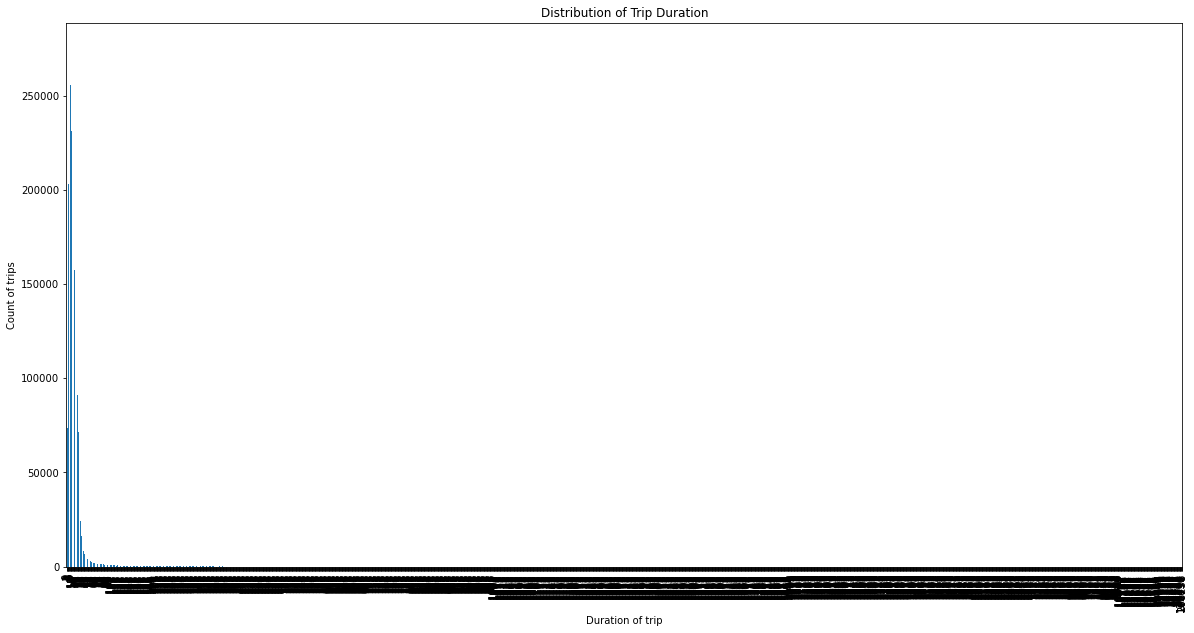

In [21]:
# Look at the distribution of trip lengths
plt.figure(figsize=(20,10))
df['Trip Duration Minutes'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Duration of trip')
plt.ylabel('Count of trips')
plt.title('Distribution of Trip Duration')
plt.show()

As suspected from the basic statistics before running this graph we see that the majority of rides are concentrated in the 12 min mark with the long tail of rides that stretch out to the longest trip length of ~200,000 min.

We will need to address this imbalance by either binning the trips into categories or dropping datapoints where trips exceed a threshold.

Based on the Toronto BikeShare Usage Fees
https://bikesharetoronto.com/get-pass/

Recalling the the pricing plan of Toronto BikeShare, any trip that exceeds 30min is sujected to late fee charges. We can bin the `Trip Duration Minutes` into a binary classifier where all trips that exceed 30min is considered late. Below you can see how long the tail of the distribution can get.

In [22]:
# Creating my dependent variable by replacing `Trip Duration Minutes` with binary classifier
df['Late Return'] = np.where(df['Trip Duration Minutes'] > 30, 1, 0)

In [23]:
# Check datatypes
df.dtypes

Trip Id                                       int64
Subscription Id                               int64
Bike Id                                       int64
Start Time                           datetime64[ns]
Start Station Id                              int64
Start Station Name                           object
Start Station Latitude                      float64
Start Station Longitude                     float64
Start Station Elevation                     float64
Start Station Capacity                        int64
Start Station Accepts Credit Card             int64
Start Station FSA                            object
End Time                             datetime64[ns]
End Station Id                                int64
End Station Name                             object
End Station Latitude                        float64
End Station Longitude                       float64
End Station Elevation                       float64
End Station Capacity                          int64
End Station 

Now that we have finished with the data wrangling, we can drop all the non-numeric features and start to create and fit our models. 

In [24]:
# drop non-numeric features
df.drop(['Start Time', 'Start Station Name', 'Start Station FSA', 
         'End Time', 'End Station Name', 'End Station FSA', 'Trip Duration Minutes', 'Season'], axis=1, inplace=True)

In [25]:
# Final datatypes check
df.dtypes

Trip Id                                int64
Subscription Id                        int64
Bike Id                                int64
Start Station Id                       int64
Start Station Latitude               float64
Start Station Longitude              float64
Start Station Elevation              float64
Start Station Capacity                 int64
Start Station Accepts Credit Card      int64
End Station Id                         int64
End Station Latitude                 float64
End Station Longitude                float64
End Station Elevation                float64
End Station Capacity                   int64
End Station Accepts Credit Card        int64
Is Member                              int64
Temp (°C)                            float64
Rel Hum (%)                          float64
Wind Spd (km/h)                      float64
Start Time Hour                        int64
Start Time Day                         int64
Start Time Month                       int64
Start Time

All the features are not numeric, lets move on to creating and fitting our logistic regression model.

## Machine Learning Model

Back to [Table of Contents](#Table-of-Contents).<br>

First we will need to separate our independent and dependent variables.

In [26]:
# Create independent and dependent variables for model training
X = df.drop(['Late Return'], axis=1)
y = df['Late Return']

In [27]:
# Check X
X.head()

,Trip Id,Subscription Id,Bike Id,Start Station Id,Start Station Latitude,Start Station Longitude,Start Station Elevation,Start Station Capacity,Start Station Accepts Credit Card,End Station Id,...,Start Time Day,Start Time Month,Start Time Year,Spring,Summer,Winter,Weekend,Rush Hour,Holiday,Trip Within FSA
0,4581278,199751,1296,7021,43.653264,-79.382458,107.0,35,1,7233,...,1,1,2019,0,0,1,1,0,1,0
1,4581279,294730,2947,7160,43.643333,-79.405556,89.0,15,1,7051,...,1,1,2019,0,0,1,1,0,1,0
2,4581280,197252,2293,7055,43.662070,-79.376170,103.0,15,1,7013,...,1,1,2019,0,0,1,1,0,1,0
3,4581281,171700,283,7012,43.656026,-79.385327,92.0,15,1,7235,...,1,1,2019,0,0,1,1,0,1,1
4,4581282,306314,1799,7041,43.656729,-79.382736,103.0,23,1,7257,...,1,1,2019,0,0,1,1,0,1,0


In [28]:
# Check y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Late Return, dtype: int64

In [29]:
# Check distribution of dependent variable 
print('Distribution of dependent variable:\n')
print(y.value_counts())
print('\n----------------------------------------\n')
print('Pecentage of the distribution:\n')
print(y.value_counts()/(len(y)))

Distribution of dependent variable:

0    4696187
1     334657
Name: Late Return, dtype: int64

----------------------------------------

Pecentage of the distribution:

0    0.933479
1    0.066521
Name: Late Return, dtype: float64


It appears that the dependent variable is imbalanced with only 6.4% of datapoints for `Late Returns` as True. If we were to use the variable to train as is, we would not get a very good classification accuracy, precision and recall score on the dataset as we have learned in our lectures. Therefore we will need to rebalance the dependent variable by either upsampling or downsampling the data.

Because we  have over 300K datapoints that are postiive, I have decided to downsample our dataset to try and limit any biases we would inadvertedly introduce if we were to generate/copy datapoints from upsample.  

While downsampling by removing the extra datapoints from the majority class may cause the model performance to suffer, I believe that with over 600K datapoints in a balanced dataset we will still be able to get a good classification accuracy, precision and recall from the model we will train.

After some research from the imblearn library documentation found [here](https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.over_sampling). I will be testing both [ClusteredCentroid Method](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.ClusterCentroids.html#imblearn.under_sampling.ClusterCentroids) and [Random Undersampler Method](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler).

Clustered Centroid Method 'replaces a cluster of majority class by the cluster centroid of a KMeans algorithm.' In other words, it makes use of K-means to reduce the number of datapoints by replacing clusters of data therefore the method requires that the data to be grouped into clusters to begin with to work effectively. 

Random Undersampler Method removes datapoints of the majority class by randomly picking datapoints with or without replacement and can only specify desired ratios for binary classiciation problems.

Clustered Centroid Method will take longer to run than Random Undersampler Method because the way it generates new datapoints while Random Undersampler just randomly removes datapoints.

But before we undersample the data, lets see what the baseline metrics are using logistic regression model on the imbalanced dataset.

In [314]:
# train test split on dataset with 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=616)

In [315]:
# Instantiate the model
log_model = LogisticRegression()

# Fit the model
log_model = log_model.fit(X_train, y_train)

# Predict/Score
train_score = log_model.score(X_train,y_train)
test_score = log_model.score(X_test,y_test)

In [316]:
print(f'Train Accuracy: {train_score:.5f}')
print(f'Test Accuracy:  {test_score:.5f}', '\n')

Train Accuracy: 0.93348
Test Accuracy:  0.93348 



The train and test accuracy on our model looks amazing at 93%! But lets take a look at the confusion matrix to see the precision and recall. 

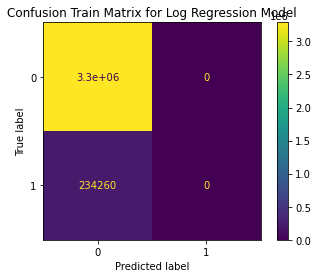

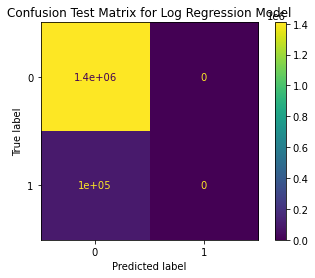

In [33]:
# ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Saving Prediction Scores
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# Confusion matrices
train_cfmatrix = confusion_matrix(y_train, y_train_pred)
test_cfmatrix = confusion_matrix(y_test, y_test_pred)

# Base dataset ConfusionMatrixDisplay

# Train
ConfusionMatrixDisplay(train_cfmatrix).plot()
plt.title('Confusion Train Matrix for Log Regression Model')
plt.show()

# Test
ConfusionMatrixDisplay(test_cfmatrix).plot()
plt.title('Confusion Test Matrix for Log Regression Model')
plt.show()

In [35]:
from sklearn.metrics import classification_report

base_report = classification_report(y_test, y_test_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97   1408857
           1       0.00      0.00      0.00    100397

    accuracy                           0.93   1509254
   macro avg       0.47      0.50      0.48   1509254
weighted avg       0.87      0.93      0.90   1509254



From the classification report, it appears that the precision and recall for negative class was 93% and 100% respectively however it failed to even capture even 1 datapoint of the positive class!

This proves that we need to rebalance the dataset in order to have the model be effective.

### Undersample the Data

Before we begin to undersample the dataset, I will need to take a subsample first in order for the Cluster Centroid Method to run in a reasonable amount of time. Once we test which method of undersampling gives us a better F1 score, then we will use that method for the overall undersampling of the data.

In [36]:
print('Distribution of dependent variable:\n')
print(y.value_counts())
print('\n----------\n')
print('Pecentage of the distribution:\n')
print(y.value_counts()/(len(y)))

Distribution of dependent variable:

0    4696187
1     334657
Name: Late Return, dtype: int64

----------

Pecentage of the distribution:

0    0.933479
1    0.066521
Name: Late Return, dtype: float64


In [37]:
# Subsample 1% of the df so it is easier to work with for our machine learning model
df_remainder, df_sample = train_test_split(df, test_size=0.01, stratify=df['Late Return'])

In [38]:
# Reset index
df_sample.reset_index(drop=True, inplace=True)

In [39]:
# Split the X and y variables once more
smX = df_sample.drop(['Late Return'], axis=1)
smy = df_sample['Late Return']

In [40]:
print('Distribution of dependent variable:\n')
print(smy.value_counts())
print('\n----------\n')
print('Pecentage of the distribution:\n')
print(smy.value_counts()/(len(smy)))

Distribution of dependent variables:

0    46962
1     3347
Name: Late Return, dtype: int64

----------

Pecentage of the distribution:

0    0.933471
1    0.066529
Name: Late Return, dtype: float64


In [41]:
from imblearn.under_sampling import ClusterCentroids

# Instantiate
cc = ClusterCentroids(random_state=616)
# Fit
smX_cc, smy_cc = cc.fit_resample(smX, smy)
# Display
print('Distribution of dependent variables:\n')
print(smy_cc.value_counts())
print('\n----------\n')
print('Pecentage of the distribution:\n')
print(smy_cc.value_counts()/(len(smy_cc)))

Distribution of dependent variables:

1    3347
0    3347
Name: Late Return, dtype: int64

----------

Pecentage of the distribution:

1    0.5
0    0.5
Name: Late Return, dtype: float64


In [42]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate
rus = RandomUnderSampler(random_state=616)
# Fit
smX_rus, smy_rus = rus.fit_resample(smX, smy)
# Display
print('Distribution of dependent variables:\n')
print(smy_rus.value_counts())
print('\n----------\n')
print('Pecentage of the distribution:\n')
print(smy_rus.value_counts()/(len(smy_rus)))

Distribution of dependent variables:

1    3347
0    3347
Name: Late Return, dtype: int64

----------

Pecentage of the distribution:

1    0.5
0    0.5
Name: Late Return, dtype: float64


In [332]:
# train test split on ClusterCentroids resampled
smX_train_cc, smX_test_cc, smy_train_cc, smy_test_cc = train_test_split(smX_cc,
                                                                        smy_cc,
                                                                        test_size=0.3,
                                                                        stratify=smy_cc,
                                                                        random_state=616)

In [44]:
# train test split on RandomUnderSampler resampled
smX_train_rus, smX_test_rus, smy_train_rus, smy_test_rus = train_test_split(smX_rus,
                                                                            smy_rus,
                                                                            test_size=0.3,
                                                                            stratify=smy_rus,
                                                                            random_state=616)

In [45]:
# Instantiate the model
log_model = LogisticRegression()

# Fit the model
smlog_model_cc = log_model.fit(smX_train_cc, smy_train_cc)
smlog_model_rus = log_model.fit(smX_train_rus, smy_train_rus)

#Predict/Score
smtrain_score_cc = smlog_model_cc.score(smX_train_cc,smy_train_cc)
smtest_score_cc = smlog_model_cc.score(smX_test_cc,smy_test_cc)
smtrain_score_rus = smlog_model_rus.score(smX_train_rus,smy_train_rus)
smtest_score_rus = smlog_model_rus.score(smX_test_rus,smy_test_rus)

In [46]:
print(f'CCLog Regression Train Accuracy: {smtrain_score_cc:.5f}')
print(f'CCLog Regression Test Accuracy:  {smtest_score_cc:.5f}', '\n')
print('------------------------------------------------------------\n')
print(f'RUSLog Regression Train Accuracy: {smtrain_score_rus:.5f}')
print(f'RUSLog Regression Test Accuracy:  {smtest_score_rus:.5f}', '\n')

CCLog Regression Train Accuracy: 0.77609
CCLog Regression Test Accuracy:  0.78298 

------------------------------------------------------------

RUSLog Regression Train Accuracy: 0.70309
RUSLog Regression Test Accuracy:  0.70134 



This logistic model looks more promising where the train and test accuracy seem more reasonable. There seems to be some minor overfitting with RandomUnderSampling however. Lets take at look at the confusion matrices and classfication report.

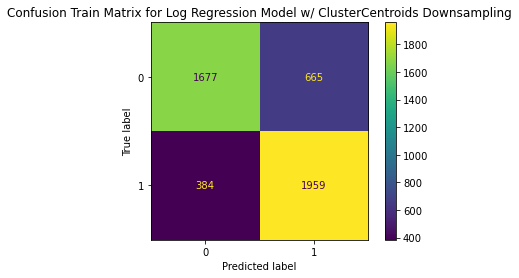

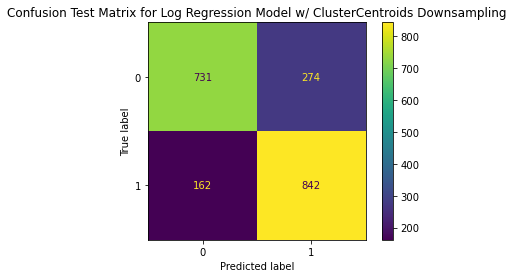

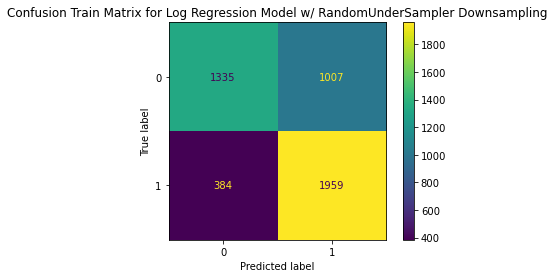

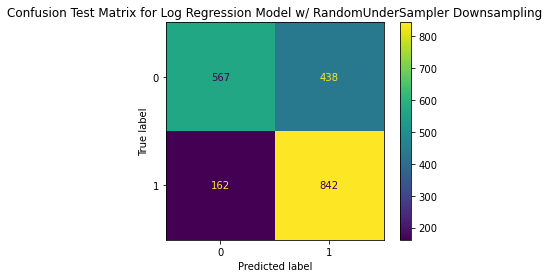

In [47]:
# Saving Prediction Scores
smy_train_pred_cc = smlog_model_cc.predict(smX_train_cc)
smy_test_pred_cc = smlog_model_cc.predict(smX_test_cc)
smy_train_pred_rus = smlog_model_rus.predict(smX_train_rus)
smy_test_pred_rus = smlog_model_rus.predict(smX_test_rus)

# Confusion matrices
smtrain_cfmatrix_cc = confusion_matrix(smy_train_cc, smy_train_pred_cc)
smtest_cfmatrix_cc = confusion_matrix(smy_test_cc, smy_test_pred_cc)
smtrain_cfmatrix_rus = confusion_matrix(smy_train_cc, smy_train_pred_rus)
smtest_cfmatrix_rus = confusion_matrix(smy_test_cc, smy_test_pred_rus)

# ClusterCentroids Downsampling ConfusionMatrixDisplay

# Train
ConfusionMatrixDisplay(smtrain_cfmatrix_cc).plot()
plt.title('Confusion Train Matrix for Log Regression Model w/ ClusterCentroids Downsampling')
plt.show()

# Test
ConfusionMatrixDisplay(smtest_cfmatrix_cc).plot()
plt.title('Confusion Test Matrix for Log Regression Model w/ ClusterCentroids Downsampling')
plt.show()

# RandomUnderSampler Downsampling ConfusionMatrixDisplay

# Train
ConfusionMatrixDisplay(smtrain_cfmatrix_rus).plot()
plt.title('Confusion Train Matrix for Log Regression Model w/ RandomUnderSampler Downsampling')
plt.show()

# Test
ConfusionMatrixDisplay(smtest_cfmatrix_rus).plot()
plt.title('Confusion Test Matrix for Log Regression Model w/ RandomUnderSampler Downsampling')
plt.show()

In [48]:
from sklearn.metrics import classification_report

class_report_smtest_cc = classification_report(smy_test_cc, smy_test_pred_cc)
class_report_smtest_rus = classification_report(smy_test_rus, smy_test_pred_rus)

print('Classification Report for Test Data w/ ClusterCentroids Downsampling\n')
print(class_report_smtest_cc)
print('------------------------------------------------------------\n')
print('Classification Report for Test Data w/ RandomUnderSampler Downsampling\n')
print(class_report_smtest_rus)

Classification Report for Test Data w/ ClusterCentroids Downsampling

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1005
           1       0.75      0.84      0.79      1004

    accuracy                           0.78      2009
   macro avg       0.79      0.78      0.78      2009
weighted avg       0.79      0.78      0.78      2009

------------------------------------------------------------

Classification Report for Test Data w/ RandomUnderSampler Downsampling

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      1005
           1       0.66      0.84      0.74      1004

    accuracy                           0.70      2009
   macro avg       0.72      0.70      0.70      2009
weighted avg       0.72      0.70      0.70      2009



It appears that the ClusterCentroid Method performed better than the RandomUnderSampler Method based on the F1 score where RandomUnderSampler only scored 65% for negative classification and 74% positive classification on the test data while ClusterCentroid scored 77% for negative classification and 79% for positive classification on the test data.

Therefore I will be using the ClusterCentroid Method on the full dataset and rerun the logistic regression model. However in the interest in time, I will continue to use the subsample and see if I can get better accuracy by scaling the data and hyperparameter tuning.

### Scaling the Data

In [291]:
# Instantiate scaler
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
rb_scaler = RobustScaler()

# Fit scaler
std_scaler = std_scaler.fit(smX_train_cc)
mm_scaler = mm_scaler.fit(smX_train_cc)
rb_scaler = rb_scaler.fit(smX_train_cc)

# Transform data
ss_smX_train_cc = std_scaler.transform(smX_train_cc)
ss_smX_test_cc = std_scaler.transform(smX_test_cc)
mm_smX_train_cc = mm_scaler.transform(smX_train_cc)
mm_smX_test_cc = mm_scaler.transform(smX_test_cc)
rb_smX_train_cc = rb_scaler.transform(smX_train_cc)
rb_smX_test_cc = rb_scaler.transform(smX_test_cc)

# Instantiate the model
log_model = LogisticRegression()

# Fit the model
ss_smlog_model_cc = log_model.fit(ss_smX_train_cc, smy_train_cc)
mm_smlog_model_cc = log_model.fit(mm_smX_train_cc, smy_train_cc)
rb_smlog_model_cc = log_model.fit(rb_smX_train_cc, smy_train_cc)

#Predict/Score
ss_smtrain_score_cc = ss_smlog_model_cc.score(ss_smX_train_cc,smy_train_cc)
ss_smtest_score_cc = ss_smlog_model_cc.score(ss_smX_test_cc,smy_test_cc)
mm_smtrain_score_cc = mm_smlog_model_cc.score(mm_smX_train_cc,smy_train_cc)
mm_smtest_score_cc = mm_smlog_model_cc.score(mm_smX_test_cc,smy_test_cc)
rb_smtrain_score_cc = rb_smlog_model_cc.score(rb_smX_train_cc,smy_train_cc)
rb_smtest_score_cc = rb_smlog_model_cc.score(rb_smX_test_cc,smy_test_cc)

In [292]:
print(f'CCLog Regression w/ Standard Scaling Train Accuracy: {ss_smtrain_score_cc:.5f}')
print(f'CCLog Regression w/ Standard Scaling Test Accuracy:  {ss_smtest_score_cc:.5f}', '\n')
print('------------------------------------------------------------\n')
print(f'CCLog Regression w/ MinMax Scaling Train Accuracy: {mm_smtrain_score_cc:.5f}')
print(f'CCLog Regression w/ MinMax Scaling Test Accuracy:  {mm_smtest_score_cc:.5f}', '\n')
print('------------------------------------------------------------\n')
print(f'CCLog Regression w/ Robust Scaling Train Accuracy: {rb_smtrain_score_cc:.5f}')
print(f'CCLog Regression w/ Robust Scaling Test Accuracy:  {rb_smtest_score_cc:.5f}', '\n')

CCLog Regression w/ Standard Scaling Train Accuracy: 0.93810
CCLog Regression w/ Standard Scaling Test Accuracy:  0.94873 

------------------------------------------------------------

CCLog Regression w/ MinMax Scaling Train Accuracy: 0.74963
CCLog Regression w/ MinMax Scaling Test Accuracy:  0.75709 

------------------------------------------------------------

CCLog Regression w/ Robust Scaling Train Accuracy: 0.95454
CCLog Regression w/ Robust Scaling Test Accuracy:  0.94973 



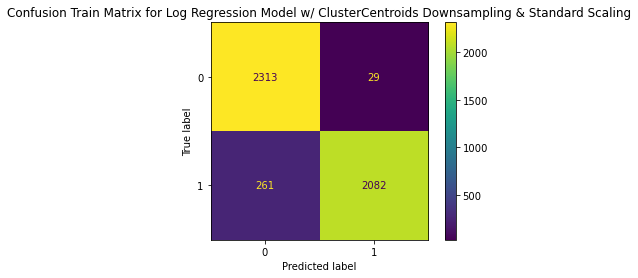

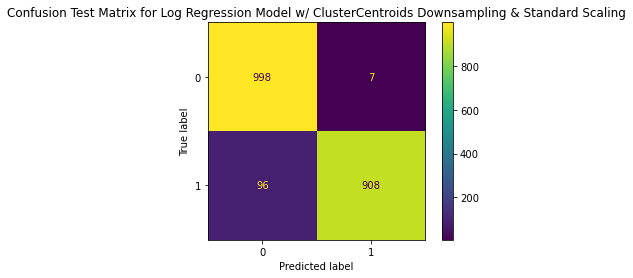

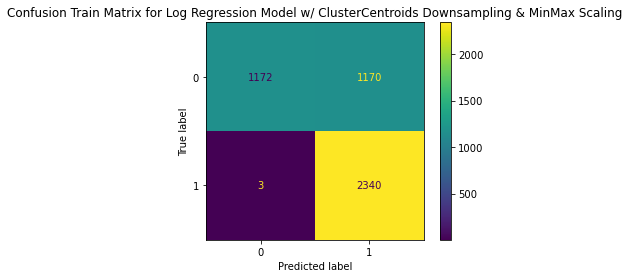

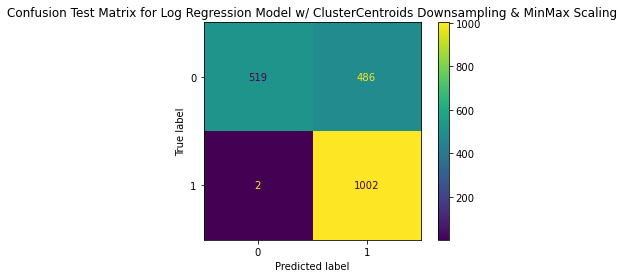

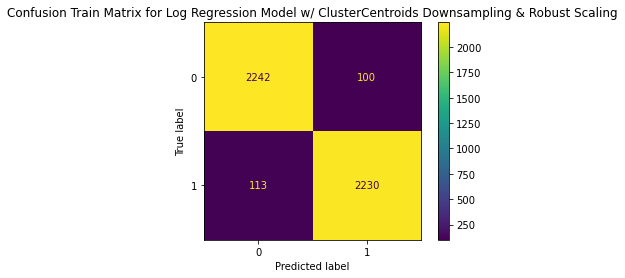

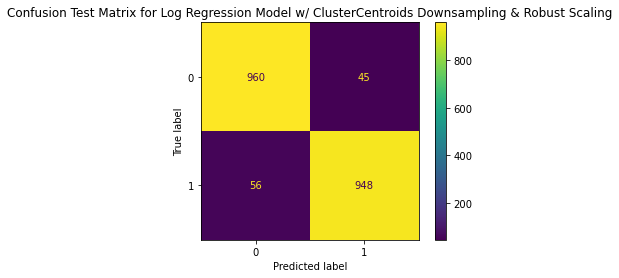

In [293]:
# Saving Prediction Scores
ss_smy_train_pred_cc = ss_smlog_model_cc.predict(ss_smX_train_cc)
ss_smy_test_pred_cc = ss_smlog_model_cc.predict(ss_smX_test_cc)
mm_smy_train_pred_cc = mm_smlog_model_cc.predict(mm_smX_train_cc)
mm_smy_test_pred_cc = mm_smlog_model_cc.predict(mm_smX_test_cc)
rb_smy_train_pred_cc = rb_smlog_model_cc.predict(rb_smX_train_cc)
rb_smy_test_pred_cc = rb_smlog_model_cc.predict(rb_smX_test_cc)

# Confusion matrices
ss_smtrain_cfmatrix_cc = confusion_matrix(smy_train_cc, ss_smy_train_pred_cc)
ss_smtest_cfmatrix_cc = confusion_matrix(smy_test_cc, ss_smy_test_pred_cc)
mm_smtrain_cfmatrix_cc = confusion_matrix(smy_train_cc, mm_smy_train_pred_cc)
mm_smtest_cfmatrix_cc = confusion_matrix(smy_test_cc, mm_smy_test_pred_cc)
rb_smtrain_cfmatrix_cc = confusion_matrix(smy_train_cc, rb_smy_train_pred_cc)
rb_smtest_cfmatrix_cc = confusion_matrix(smy_test_cc, rb_smy_test_pred_cc)

# Standard Scaling ConfusionMatrixDisplay

# Train
ConfusionMatrixDisplay(ss_smtrain_cfmatrix_cc).plot()
plt.title('Confusion Train Matrix for Log Regression Model w/ ClusterCentroids Downsampling & Standard Scaling')
plt.show()

# Test
ConfusionMatrixDisplay(ss_smtest_cfmatrix_cc).plot()
plt.title('Confusion Test Matrix for Log Regression Model w/ ClusterCentroids Downsampling & Standard Scaling')
plt.show()

# MinMax Scaling ConfusionMatrixDisplay 

# Train
ConfusionMatrixDisplay(mm_smtrain_cfmatrix_cc).plot()
plt.title('Confusion Train Matrix for Log Regression Model w/ ClusterCentroids Downsampling & MinMax Scaling')
plt.show()

# Test
ConfusionMatrixDisplay(mm_smtest_cfmatrix_cc).plot()
plt.title('Confusion Test Matrix for Log Regression Model w/ ClusterCentroids Downsampling & MinMax Scaling')
plt.show()

# Robust Scaling ConfusionMatrixDisplay 

# Train
ConfusionMatrixDisplay(rb_smtrain_cfmatrix_cc).plot()
plt.title('Confusion Train Matrix for Log Regression Model w/ ClusterCentroids Downsampling & Robust Scaling')
plt.show()

# Test
ConfusionMatrixDisplay(rb_smtest_cfmatrix_cc).plot()
plt.title('Confusion Test Matrix for Log Regression Model w/ ClusterCentroids Downsampling & Robust Scaling')
plt.show()

In [294]:
# Classification Reports
class_report_ss_smtrain_cc = classification_report(smy_train_cc, ss_smy_train_pred_cc)
class_report_ss_smtest_cc = classification_report(smy_test_cc, ss_smy_test_pred_cc)
class_report_mm_smtrain_cc = classification_report(smy_train_cc, mm_smy_train_pred_cc)
class_report_mm_smtest_cc = classification_report(smy_test_cc, mm_smy_test_pred_cc)
class_report_rb_smtrain_cc = classification_report(smy_train_cc, rb_smy_train_pred_cc)
class_report_rb_smtest_cc = classification_report(smy_test_cc, rb_smy_test_pred_cc)

print('Classification Report for Test Data w/ ClusterCentroids & Standard Scaling\n')
print(class_report_ss_smtest_cc)
print('------------------------------------------------------------\n')
print('Classification Report for Test Data w/ ClusterCentroids & MinMax Scaling \n')
print(class_report_mm_smtest_cc)
print('------------------------------------------------------------\n')
print('Classification Report for Test Data w/ ClusterCentroids & Robust Scaling \n')
print(class_report_rb_smtest_cc)

Classification Report for Test Data w/ ClusterCentroids & Standard Scaling

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1005
           1       0.99      0.90      0.95      1004

    accuracy                           0.95      2009
   macro avg       0.95      0.95      0.95      2009
weighted avg       0.95      0.95      0.95      2009

------------------------------------------------------------

Classification Report for Test Data w/ ClusterCentroids & MinMax Scaling 

              precision    recall  f1-score   support

           0       1.00      0.52      0.68      1005
           1       0.67      1.00      0.80      1004

    accuracy                           0.76      2009
   macro avg       0.83      0.76      0.74      2009
weighted avg       0.83      0.76      0.74      2009

------------------------------------------------------------

Classification Report for Test Data w/ ClusterCentroids & Robust Scalin

It looks like with MinMax Scaling the logistic model is performing exceptionally well with an F1 score of 95%! Let's take a look at the coefficients to see which feature is contributing to this high level of model accuracy as well as precision and recall.

,coefficient,odds_ratio
Trip Within FSA,4.133740,62.410916
Rush Hour,3.606064,36.820826
Start Station Accepts Credit Card,3.307170,27.307736
End Station Accepts Credit Card,3.185227,24.172770
Subscription Id,2.486237,12.015976
Spring,2.006703,7.438755
Winter,1.547510,4.699754
Summer,1.150459,3.159642
Holiday,1.130062,3.095849
Start Time Day,0.719957,2.054344


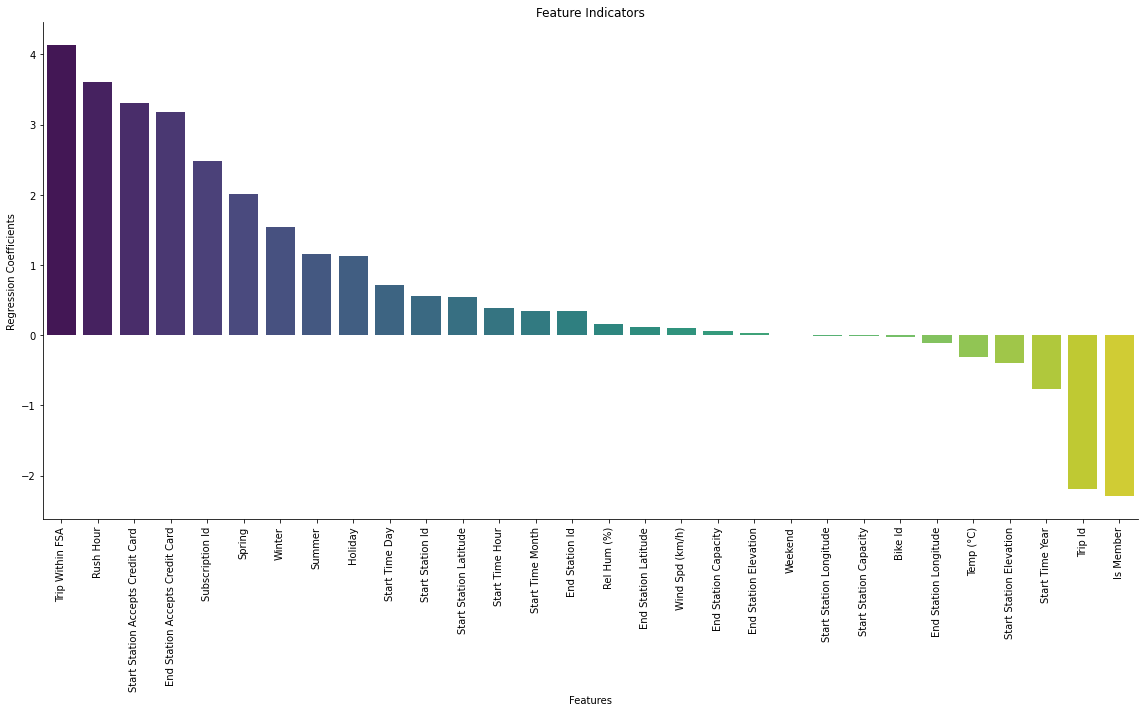

In [295]:
# Look at coefficients
coefs_odds = pd.DataFrame(data={'coefficient': rb_smlog_model_cc.coef_[0],
                               'odds_ratio': np.exp(rb_smlog_model_cc.coef_[0])},
                          index=smX_test_cc.columns
                         ).sort_values('coefficient', ascending=False)

display(coefs_odds)

plt.figure(figsize=(16, 10))
# plt.bar(coefs_odds.index, coefs_odds['coefficient'], color='r')
sns.barplot(x=coefs_odds.index, y=coefs_odds['coefficient'], palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Regression Coefficients')
plt.title('Feature Indicators')
sns.despine()
plt.tight_layout()
plt.show()

By the looks of the scale of the coefficients there seems to be an issue with my feature selection. I will need to use VIF to see if there are any multicolinearity occuring in my dataset.

### Removing Multicollinearity

In [296]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(smX_train_cc.values, i) 
           for i in range(smX_train_cc.shape[1])],
           index=smX_train_cc.columns)

Trip Id                              9.021107e+01
Subscription Id                      7.494890e+00
Bike Id                              1.212079e+00
Start Station Id                     1.393182e+00
Start Station Latitude               7.876541e+00
Start Station Longitude              3.381358e+00
Start Station Elevation              4.640996e+00
Start Station Capacity               1.259657e+00
Start Station Accepts Credit Card    1.766138e+00
End Station Id                       1.393118e+00
End Station Latitude                 7.494735e+00
End Station Longitude                3.394638e+00
End Station Elevation                4.285498e+00
End Station Capacity                 1.247295e+00
End Station Accepts Credit Card      1.744889e+00
Is Member                            2.531791e+00
Temp (°C)                            2.385659e+00
Rel Hum (%)                          1.113722e+00
Wind Spd (km/h)                      1.149533e+00
Start Time Hour                      1.068283e+00


Looks like `Weekend` feature is my culprit, therefore I will drop that feature and rerun the VIF to see if there are anymore until there are no substantial drops in VIF

In [333]:
# Drop `Weekend`
smX_train_cc.drop(['Weekend'], axis=1, inplace=True)

pd.Series([variance_inflation_factor(smX_train_cc.values, i) 
           for i in range(smX_train_cc.shape[1])],
           index=smX_train_cc.columns)

Trip Id                              2.927291e+02
Subscription Id                      7.949119e+01
Bike Id                              7.852574e+00
Start Station Id                     4.714977e+03
Start Station Latitude               5.664432e+07
Start Station Longitude              1.744085e+07
Start Station Elevation              1.690650e+02
Start Station Capacity               1.869055e+01
Start Station Accepts Credit Card    4.302294e+00
End Station Id                       4.592344e+03
End Station Latitude                 5.490055e+07
End Station Longitude                1.672573e+07
End Station Elevation                1.644045e+02
End Station Capacity                 1.859586e+01
End Station Accepts Credit Card      4.350337e+00
Is Member                            5.323499e+00
Temp (°C)                            1.385293e+01
Rel Hum (%)                          3.263995e+01
Wind Spd (km/h)                      6.803924e+00
Start Time Hour                      1.931998e+01


Next feature that needs to be dropped looks to be `Start Time Year`

In [334]:
# Drop `Start Time Year`
smX_train_cc.drop(['Start Time Year'], axis=1, inplace=True)

pd.Series([variance_inflation_factor(smX_train_cc.values, i) 
           for i in range(smX_train_cc.shape[1])],
           index=smX_train_cc.columns)

Trip Id                              1.610504e+02
Subscription Id                      7.928752e+01
Bike Id                              7.846397e+00
Start Station Id                     4.521368e+03
Start Station Latitude               4.760193e+07
Start Station Longitude              1.500910e+07
Start Station Elevation              1.374799e+02
Start Station Capacity               1.868579e+01
Start Station Accepts Credit Card    4.300723e+00
End Station Id                       4.396595e+03
End Station Latitude                 4.723420e+07
End Station Longitude                1.480496e+07
End Station Elevation                1.380394e+02
End Station Capacity                 1.858824e+01
End Station Accepts Credit Card      4.345986e+00
Is Member                            5.322162e+00
Temp (°C)                            1.375330e+01
Rel Hum (%)                          3.263758e+01
Wind Spd (km/h)                      6.800477e+00
Start Time Hour                      1.931875e+01


In [335]:
# Drop `End Station` Info as we are trying to predict if the return will be late 
# prior to them actually returning the bike
smX_train_cc.drop(['Start Station Latitude',
                  'Start Station Longitude',
                  'End Station Latitude',
                  'End Station Longitude'], axis=1, inplace=True)

pd.Series([variance_inflation_factor(smX_train_cc.values, i) 
           for i in range(smX_train_cc.shape[1])],
           index=smX_train_cc.columns)

Trip Id                               160.527074
Subscription Id                        78.874624
Bike Id                                 7.828337
Start Station Id                     2840.405610
Start Station Elevation                61.316111
Start Station Capacity                 18.005676
Start Station Accepts Credit Card       4.297890
End Station Id                       2814.866340
End Station Elevation                  63.116866
End Station Capacity                   17.841346
End Station Accepts Credit Card         4.340960
Is Member                               5.301618
Temp (°C)                              13.736869
Rel Hum (%)                            32.410477
Wind Spd (km/h)                         6.791019
Start Time Hour                        19.216219
Start Time Day                          4.240134
Start Time Month                       24.201262
Spring                                  3.146975
Summer                                  4.689798
Winter              

In [336]:
# Drop Latitude and Longitude Info
smX_train_cc.drop(['Start Station Id',
                  'End Station Id'], axis=1, inplace=True)

pd.Series([variance_inflation_factor(smX_train_cc.values, i) 
           for i in range(smX_train_cc.shape[1])],
           index=smX_train_cc.columns)

Trip Id                              152.790908
Subscription Id                       77.507020
Bike Id                                7.805305
Start Station Elevation               56.934582
Start Station Capacity                16.857708
Start Station Accepts Credit Card      4.265276
End Station Elevation                 58.737326
End Station Capacity                  16.645083
End Station Accepts Credit Card        4.302090
Is Member                              5.297615
Temp (°C)                             13.189972
Rel Hum (%)                           26.149821
Wind Spd (km/h)                        6.291682
Start Time Hour                       17.499960
Start Time Day                         4.117607
Start Time Month                      22.810805
Spring                                 2.829294
Summer                                 4.613888
Winter                                 1.660238
Rush Hour                              1.476228
Holiday                                1

In [337]:
# Drop Trip Id
smX_train_cc.drop(['Trip Id'], axis=1, inplace=True)

pd.Series([variance_inflation_factor(smX_train_cc.values, i) 
           for i in range(smX_train_cc.shape[1])],
           index=smX_train_cc.columns)

Subscription Id                      16.165835
Bike Id                               7.555051
Start Station Elevation              56.688734
Start Station Capacity               16.795961
Start Station Accepts Credit Card     4.249431
End Station Elevation                58.607797
End Station Capacity                 16.618083
End Station Accepts Credit Card       4.281654
Is Member                             3.396109
Temp (°C)                            13.141257
Rel Hum (%)                          26.000553
Wind Spd (km/h)                       6.274066
Start Time Hour                      17.339662
Start Time Day                        4.104986
Start Time Month                     22.428692
Spring                                2.821811
Summer                                4.593672
Winter                                1.648073
Rush Hour                             1.470905
Holiday                               1.117125
Trip Within FSA                       1.539162
dtype: float6

In [338]:
# Drop Start Station Info
smX_train_cc.drop(['Start Station Elevation',
                   'End Station Elevation'], axis=1, inplace=True)

pd.Series([variance_inflation_factor(smX_train_cc.values, i) 
           for i in range(smX_train_cc.shape[1])],
           index=smX_train_cc.columns)

Subscription Id                      15.867827
Bike Id                               7.518143
Start Station Capacity               16.290914
Start Station Accepts Credit Card     4.219613
End Station Capacity                 16.233203
End Station Accepts Credit Card       4.258371
Is Member                             3.210200
Temp (°C)                            13.068653
Rel Hum (%)                          21.669702
Wind Spd (km/h)                       5.989830
Start Time Hour                      16.663240
Start Time Day                        4.102153
Start Time Month                     21.319777
Spring                                2.665931
Summer                                4.568570
Winter                                1.594408
Rush Hour                             1.467653
Holiday                               1.117119
Trip Within FSA                       1.537823
dtype: float64

In [339]:
# # Drop `Start Time Month`
# smX_train_cc.drop(['Start Time Month'], axis=1, inplace=True)

# pd.Series([variance_inflation_factor(smX_train_cc.values, i) 
#            for i in range(smX_train_cc.shape[1])],
#            index=smX_train_cc.columns)

I'm satified with the current VIFs and there were no more significant drops after dropping `Start Time Month` as you can see from the results here from the commented out codes above.

```
Subscription Id                      14.364582
Bike Id                               7.475822
Start Station Capacity               16.220785
Start Station Accepts Credit Card     4.214150
End Station Capacity                 16.119733
End Station Accepts Credit Card       4.255264
Is Member                             3.096410
Temp (°C)                            12.841965
Rel Hum (%)                          19.465637
Wind Spd (km/h)                       5.831568
Start Time Hour                      16.407253
Start Time Day                        4.090163
Spring                                2.096959
Summer                                4.384368
Winter                                1.305972
Rush Hour                             1.465894
Holiday                               1.115315
Trip Within FSA                       1.537064
dtype: float64
```
First I will need to perform the same feature edits to `smX_test_cc` then I will rerun the model and how it performs with both scaling.

In [340]:
# Drop same features as test set.
smX_test_cc.drop(['Weekend',
                  'Start Time Year',
                  'End Station Id',
                  'End Station Latitude',
                  'End Station Longitude',
                  'End Station Elevation',
                  'Start Station Latitude',
                  'Start Station Longitude',
                  'Start Station Id',
                  'Start Station Elevation',
                  'Trip Id'], axis=1, inplace=True)

### Retesting the Model

In [306]:
# Instantiate scaler
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
rb_scaler = RobustScaler()

# Fit scaler
std_scaler = std_scaler.fit(smX_train_cc)
mm_scaler = mm_scaler.fit(smX_train_cc)
rb_scaler = rb_scaler.fit(smX_train_cc)

# Transform data
ss_smX_train_cc = std_scaler.transform(smX_train_cc)
ss_smX_test_cc = std_scaler.transform(smX_test_cc)
mm_smX_train_cc = mm_scaler.transform(smX_train_cc)
mm_smX_test_cc = mm_scaler.transform(smX_test_cc)
rb_smX_train_cc = rb_scaler.transform(smX_train_cc)
rb_smX_test_cc = rb_scaler.transform(smX_test_cc)

# Instantiate the model
log_model = LogisticRegression()

# Fit the model
ss_smlog_model_cc = log_model.fit(ss_smX_train_cc, smy_train_cc)
mm_smlog_model_cc = log_model.fit(mm_smX_train_cc, smy_train_cc)
rb_smlog_model_cc = log_model.fit(rb_smX_train_cc, smy_train_cc)

#Predict/Score
ss_smtrain_score_cc = ss_smlog_model_cc.score(ss_smX_train_cc,smy_train_cc)
ss_smtest_score_cc = ss_smlog_model_cc.score(ss_smX_test_cc,smy_test_cc)
mm_smtrain_score_cc = mm_smlog_model_cc.score(mm_smX_train_cc,smy_train_cc)
mm_smtest_score_cc = mm_smlog_model_cc.score(mm_smX_test_cc,smy_test_cc)
rb_smtrain_score_cc = rb_smlog_model_cc.score(rb_smX_train_cc,smy_train_cc)
rb_smtest_score_cc = rb_smlog_model_cc.score(rb_smX_test_cc,smy_test_cc)

In [307]:
print(f'CCLog Regression w/ Standard Scaling Train Accuracy: {ss_smtrain_score_cc:.5f}')
print(f'CCLog Regression w/ Standard Scaling Test Accuracy:  {ss_smtest_score_cc:.5f}', '\n')
print('------------------------------------------------------------\n')
print(f'CCLog Regression w/ MinMax Scaling Train Accuracy: {mm_smtrain_score_cc:.5f}')
print(f'CCLog Regression w/ MinMax Scaling Test Accuracy:  {mm_smtest_score_cc:.5f}', '\n')
print('------------------------------------------------------------\n')
print(f'CCLog Regression w/ Robust Scaling Train Accuracy: {rb_smtrain_score_cc:.5f}')
print(f'CCLog Regression w/ Robust Scaling Test Accuracy:  {rb_smtest_score_cc:.5f}', '\n')

CCLog Regression w/ Standard Scaling Train Accuracy: 0.92850
CCLog Regression w/ Standard Scaling Test Accuracy:  0.93828 

------------------------------------------------------------

CCLog Regression w/ MinMax Scaling Train Accuracy: 0.79018
CCLog Regression w/ MinMax Scaling Test Accuracy:  0.79194 

------------------------------------------------------------

CCLog Regression w/ Robust Scaling Train Accuracy: 0.94514
CCLog Regression w/ Robust Scaling Test Accuracy:  0.95371 



Looks like the test and accuracy scores are still very high. Lets see what the confusion matrix and classification report shows.

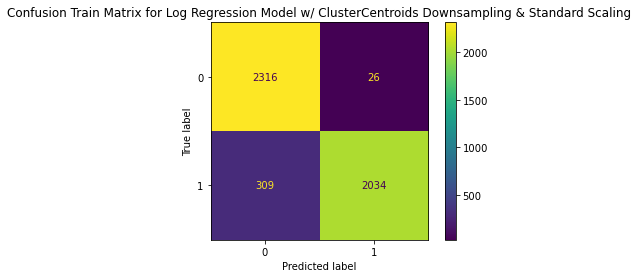

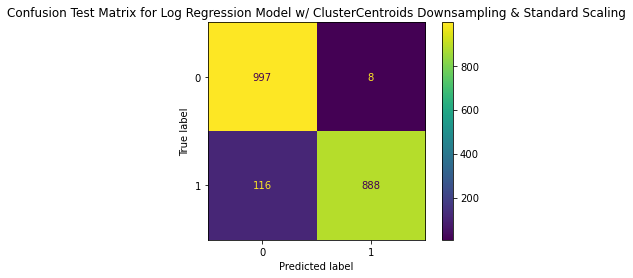

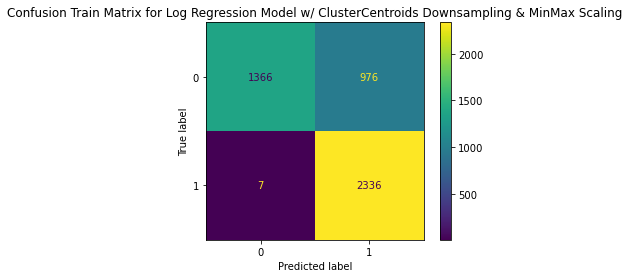

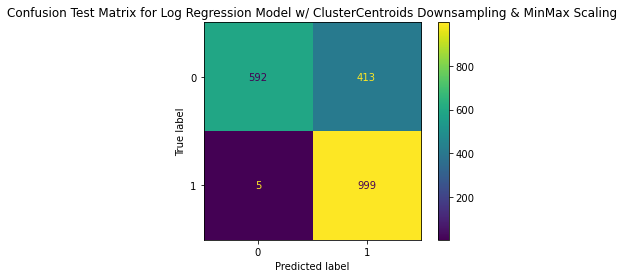

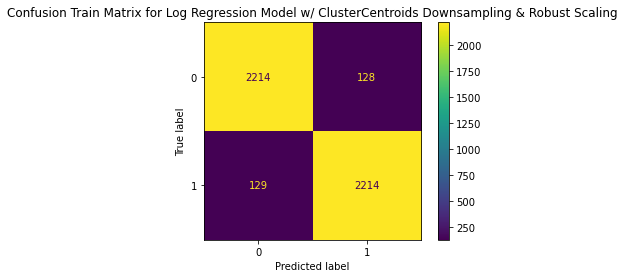

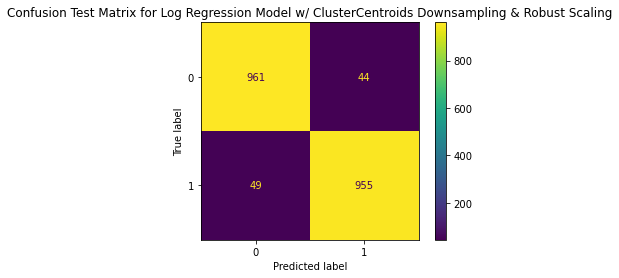

In [308]:
# Saving Prediction Scores
ss_smy_train_pred_cc = ss_smlog_model_cc.predict(ss_smX_train_cc)
ss_smy_test_pred_cc = ss_smlog_model_cc.predict(ss_smX_test_cc)
mm_smy_train_pred_cc = mm_smlog_model_cc.predict(mm_smX_train_cc)
mm_smy_test_pred_cc = mm_smlog_model_cc.predict(mm_smX_test_cc)
rb_smy_train_pred_cc = rb_smlog_model_cc.predict(rb_smX_train_cc)
rb_smy_test_pred_cc = rb_smlog_model_cc.predict(rb_smX_test_cc)

# Confusion matrices
ss_smtrain_cfmatrix_cc = confusion_matrix(smy_train_cc, ss_smy_train_pred_cc)
ss_smtest_cfmatrix_cc = confusion_matrix(smy_test_cc, ss_smy_test_pred_cc)
mm_smtrain_cfmatrix_cc = confusion_matrix(smy_train_cc, mm_smy_train_pred_cc)
mm_smtest_cfmatrix_cc = confusion_matrix(smy_test_cc, mm_smy_test_pred_cc)
rb_smtrain_cfmatrix_cc = confusion_matrix(smy_train_cc, rb_smy_train_pred_cc)
rb_smtest_cfmatrix_cc = confusion_matrix(smy_test_cc, rb_smy_test_pred_cc)

# Standard Scaling ConfusionMatrixDisplay

# Train
ConfusionMatrixDisplay(ss_smtrain_cfmatrix_cc).plot()
plt.title('Confusion Train Matrix for Log Regression Model w/ ClusterCentroids Downsampling & Standard Scaling')
plt.show()

# Test
ConfusionMatrixDisplay(ss_smtest_cfmatrix_cc).plot()
plt.title('Confusion Test Matrix for Log Regression Model w/ ClusterCentroids Downsampling & Standard Scaling')
plt.show()

# MinMax Scaling ConfusionMatrixDisplay 

# Train
ConfusionMatrixDisplay(mm_smtrain_cfmatrix_cc).plot()
plt.title('Confusion Train Matrix for Log Regression Model w/ ClusterCentroids Downsampling & MinMax Scaling')
plt.show()

# Test
ConfusionMatrixDisplay(mm_smtest_cfmatrix_cc).plot()
plt.title('Confusion Test Matrix for Log Regression Model w/ ClusterCentroids Downsampling & MinMax Scaling')
plt.show()

# Robust Scaling ConfusionMatrixDisplay 

# Train
ConfusionMatrixDisplay(rb_smtrain_cfmatrix_cc).plot()
plt.title('Confusion Train Matrix for Log Regression Model w/ ClusterCentroids Downsampling & Robust Scaling')
plt.show()

# Test
ConfusionMatrixDisplay(rb_smtest_cfmatrix_cc).plot()
plt.title('Confusion Test Matrix for Log Regression Model w/ ClusterCentroids Downsampling & Robust Scaling')
plt.show()

In [309]:
# Classification Reports
class_report_ss_smtrain_cc = classification_report(smy_train_cc, ss_smy_train_pred_cc)
class_report_ss_smtest_cc = classification_report(smy_test_cc, ss_smy_test_pred_cc)
class_report_mm_smtrain_cc = classification_report(smy_train_cc, mm_smy_train_pred_cc)
class_report_mm_smtest_cc = classification_report(smy_test_cc, mm_smy_test_pred_cc)
class_report_rb_smtrain_cc = classification_report(smy_train_cc, rb_smy_train_pred_cc)
class_report_rb_smtest_cc = classification_report(smy_test_cc, rb_smy_test_pred_cc)

print('Classification Report for Test Data w/ ClusterCentroids & Standard Scaling\n')
print(class_report_ss_smtest_cc)
print('------------------------------------------------------------\n')
print('Classification Report for Test Data w/ ClusterCentroids & MinMax Scaling \n')
print(class_report_mm_smtest_cc)
print('------------------------------------------------------------\n')
print('Classification Report for Test Data w/ ClusterCentroids & Robust Scaling \n')
print(class_report_rb_smtest_cc)

Classification Report for Test Data w/ ClusterCentroids & Standard Scaling

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1005
           1       0.99      0.88      0.93      1004

    accuracy                           0.94      2009
   macro avg       0.94      0.94      0.94      2009
weighted avg       0.94      0.94      0.94      2009

------------------------------------------------------------

Classification Report for Test Data w/ ClusterCentroids & MinMax Scaling 

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1005
           1       0.71      1.00      0.83      1004

    accuracy                           0.79      2009
   macro avg       0.85      0.79      0.78      2009
weighted avg       0.85      0.79      0.78      2009

------------------------------------------------------------

Classification Report for Test Data w/ ClusterCentroids & Robust Scalin

It still appears that the Robust Scaling is giving us good precision and recall. Now lets see if our feature coefficients look right.

,coefficient,odds_ratio
Trip Within FSA,4.113928,61.186557
Rush Hour,3.670053,39.253973
Start Station Accepts Credit Card,2.974649,19.582749
End Station Accepts Credit Card,2.764362,15.868910
Spring,1.806344,6.088149
Holiday,1.545772,4.691594
Winter,1.349985,3.857368
Summer,1.286287,3.619321
Start Time Day,0.813582,2.255975
Subscription Id,0.600792,1.823562


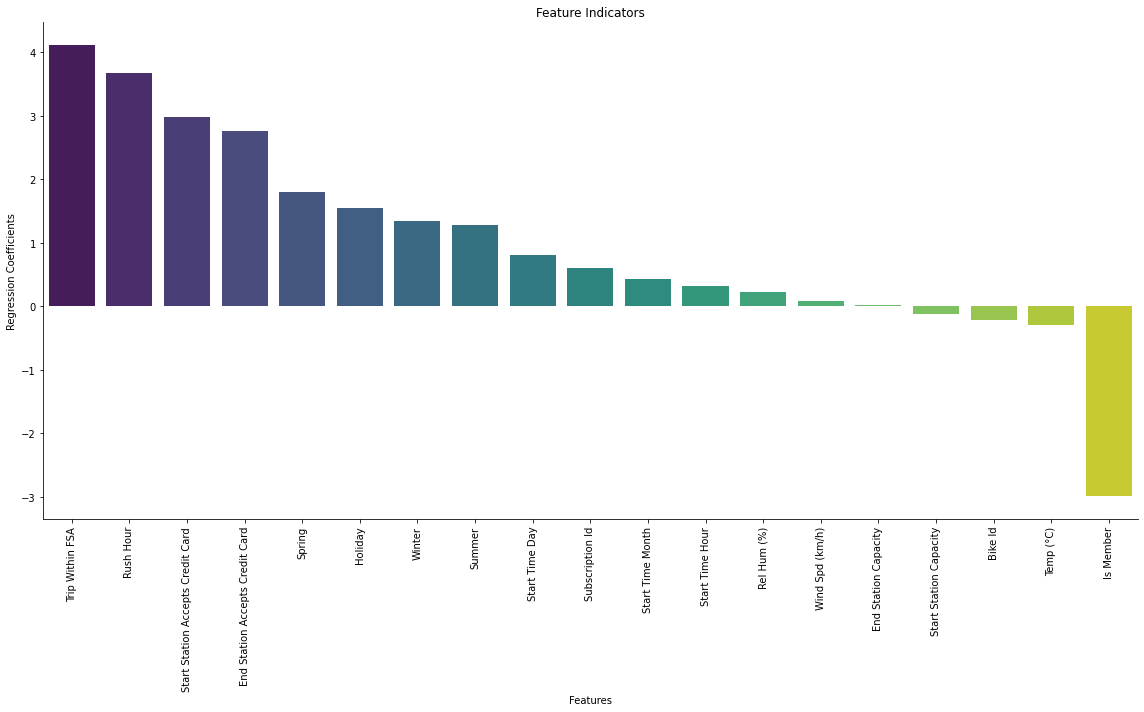

In [310]:
# Look at coefficients
smcc_coefs_odds = pd.DataFrame(data={'coefficient': rb_smlog_model_cc.coef_[0],
                               'odds_ratio': np.exp(rb_smlog_model_cc.coef_[0])},
                          index=smX_test_cc.columns
                         ).sort_values('coefficient', ascending=False)

display(smcc_coefs_odds)

plt.figure(figsize=(16, 10))
# plt.bar(coefs_odds.index, coefs_odds['coefficient'], color='r')
sns.barplot(x=smcc_coefs_odds.index, y=smcc_coefs_odds['coefficient'], palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Regression Coefficients')
plt.title('Feature Indicators')
sns.despine()
plt.tight_layout()
plt.show()

It looks like even after removing features with a high VIF that the Regression Coefficients are still more than +/- 1 indicating some multicolinearity.

Lets take a look at the correlation heatmap and see if we can detect any more multicolinear variables.

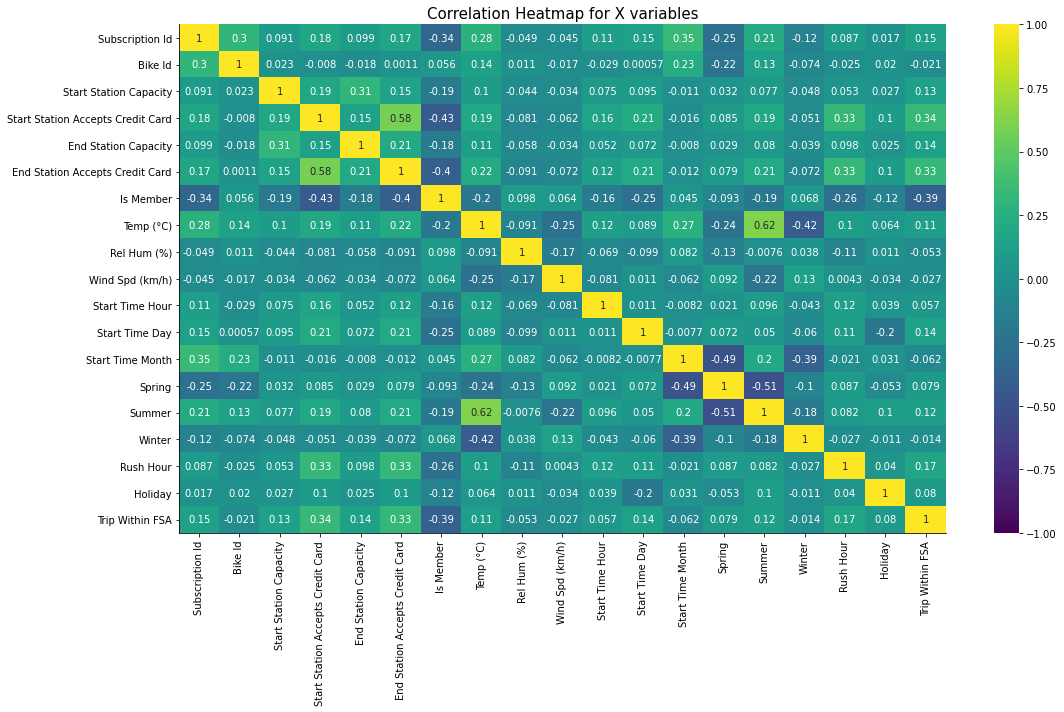

In [341]:
# Plot correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(smX_train_cc.corr(), cmap= 'viridis', vmax=1, vmin=-1, annot=True)
plt.title('Correlation Heatmap for X variables', fontsize= 15)

sns.despine()
plt.tight_layout()
plt.show()

## Summary & Next Steps

Back to [Table of Contents](#Table-of-Contents).

There does not seem to be any features with abnormally high correlation detected in the heatmap therefore I seem to have exhausted all the options that I am able to come up with to decrease the high feature coefficients.

What is not shown in the notebook is the many attempts to drop features in order to lower the coefficients to no success. Therefore I will have to be content with my current results.

My next steps will be to complete a times series analysis and network analysis in subsequent notebooks. I will also be testing different hyperparameters in my model and research other methods to see if I can take away the multicollinearity in my dataset.

To summarize, the current train and test accuracy for my logistic regression model with ClusterCentroid downsampling and robust scaling is 94.5% for the train set and 95.3% for the test set using a subsampled dataset. The F1 score for both positive and negative classes were 0.95 which is exceptionally high. The features that contribute to the high accuracy of the model are `Trip Within FSA`, `Rush Hour` with positive coefficents and `Is Member` with negative coefficient.

Code below for future use in hyperparameter tuning.

In [ ]:
# from imblearn.under_sampling import ClusterCentroids

# # Instantiate
# cc = ClusterCentroids(random_state=616)

# # Fit
# X_cc_resampled, y_cc_resampled = cc.fit_resample(X, y)

# # Display
# print('Distribution of dependent variables:\n')
# print(y_cc_resampled.value_counts())
# print('\n----------\n')
# print('Pecentage of the distribution:\n')
# print(y_cc_resampled.value_counts()/(len(y_cc_resampled)))

In [38]:
# # train test split on ClusterCentroids resampled
# X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X_cc,
#                                                                 y_cc,
#                                                                 test_size=0.3,
#                                                                 stratify=y_cc,
#                                                                 random_state=616)

In [45]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# # Set up pipeline 
# pipeline = Pipeline([('scale', StandardScaler()),
#                     ('model', LogisticRegression())])

# # Set up parameter grid
# param_grid = [
#             {
#                 'scale':[RobustScaler(), None],
#                 'model':[LogisticRegression()],
#                 'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                 'decompose__n_components': [1,2,3,4,5]
#             },
#     {
#                 'scale':[RobustScaler(), None],
#                 'model':[DecisionTreeClassifier()],
#                 'decompose__n_components': [1,2,3,4,5],
#                 'model__max_depth': [1,2,3,4,5]
#     },
#     {
#                 'scale':[RobustScaler(), None],
#                 'model':[SVC()],
#                 'decompose__n_components': [1,2,3,4,5],
#                 'model__C': [0.1, 1, 10, 100],
#                 'model__kernel': ['linear', 'rbf']
#     }
    
# ]

# # Instantiate the grid search
# gridsearch = GridSearchCV(pipeline, param_grid, n_jobs=-1, verbose=1)

# # Fit the grid search
# fittedgrid_cc = gridsearch.fit(X_train_cc, y_train_cc)

In [47]:
# Best estimator object
# print('Best Estimator for ClusterCentroids Downsampling\n')
# display(fittedgrid_cc.best_estimator_)

In [48]:
# Best hyperparameters
# print('Best Hyperparameter for ClusterCentroids Downsampling\n')
# display(fittedgrid_cc.best_params_)

In [49]:
# Test Score
# print('Test score ClusterCentroids Downsampling\n')
# display(fittedgrid_cc.score(X_test_cc, y_test_cc))